<a href="https://colab.research.google.com/github/codewithsrs/data-analysis/blob/main/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
sales_data = pd.read_csv("/content/sales_data.csv",encoding='unicode_escape')

In [15]:
sales_data.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [16]:
#Overview of the dataframe
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [45]:
#Dropping un necessary columns, from the above cell we can see that last two columns
#do not contain any value, so it will be good to drop them

sales_data1 = sales_data.drop(['Status','unnamed1'], axis = 1)
sales_data1.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [20]:
Customer_data = pd.DataFrame(sales_data.Cust_name.value_counts()).reset_index()
Customer_data.rename({'index':'Customer_name','Cust_name':'Count'}, axis = 1, inplace = True)

In [46]:
Customer_data.head()

,Customer_name,Count
0,Vishakha,42
1,Shreyshi,32
2,Sudevi,30
3,Akshat,29
4,Alejandro,28


In [48]:
Distribution_by_gender_age = sales_data[['Age Group','Gender']]

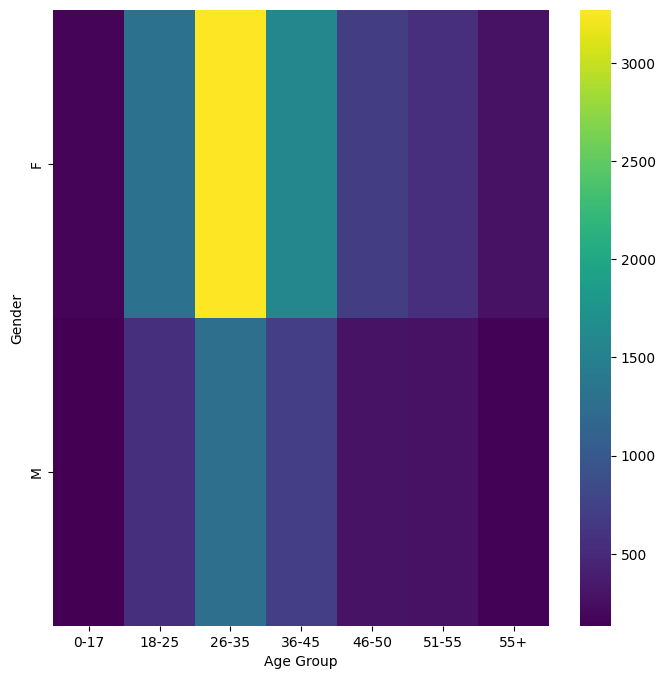

In [52]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Gender'].value_counts()
    for x_label, grp in Distribution_by_gender_age.groupby('Age Group')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Age Group')
_ = plt.ylabel('Gender')

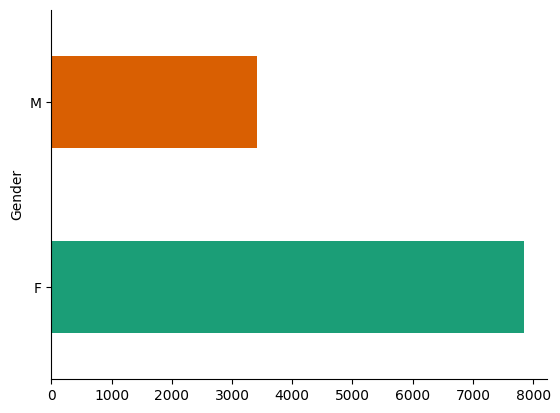

In [53]:
Distribution_by_gender_age.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

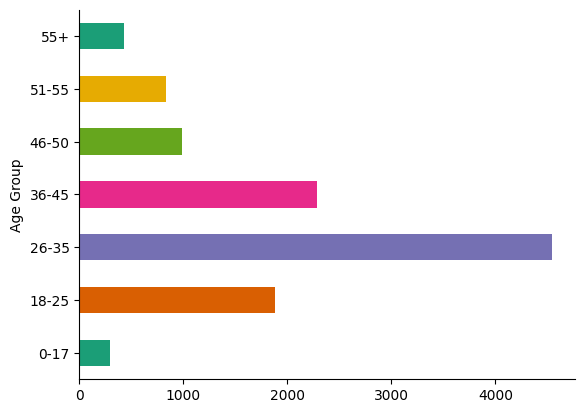

In [54]:
Distribution_by_gender_age.groupby('Age Group').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

From the above charts we can see that , **Mostly 26-35** age group customers have made purchases, which is **more than 4000**

In that **Female** customers have a **highest contribution**, while male customers are relatively low .

In the over all **customer group** also, **Male customers** are **significantly low** in number than the female customers

In [57]:
most_age_group_occupation = sales_data[['Occupation','Age Group']]
most_age_group_occupation.head()

,Occupation,Age Group
0,Healthcare,26-35
1,Govt,26-35
2,Automobile,26-35
3,Construction,0-17
4,Food Processing,26-35


In [85]:
most_age_group_occupation_26_35 = pd.DataFrame(most_age_group_occupation.loc[most_age_group_occupation['Age Group']=='26-35'])

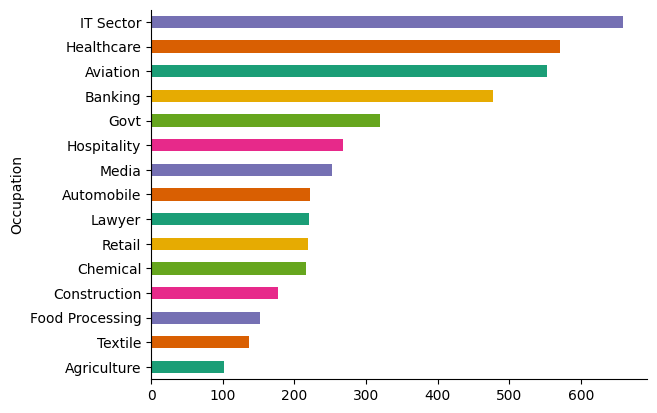

In [95]:
most_age_group_occupation_26_35.groupby('Occupation').size().sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

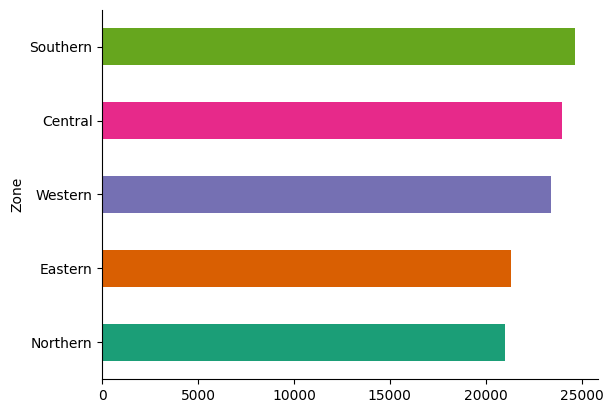

In [101]:
#Average sales by region
sales_data.groupby('Zone').apply(lambda x:((x['Amount']*x['Orders'])).mean()).sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='Amount', ylabel='Zone'>

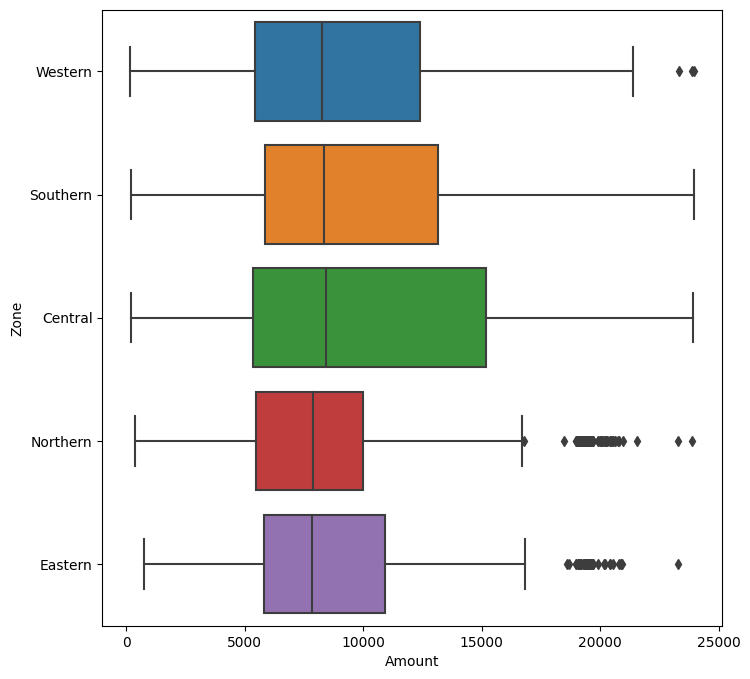

In [131]:
plt.subplots(figsize=(8, 8))
sns.boxplot(sales_data,x = 'Amount', y = 'Zone')

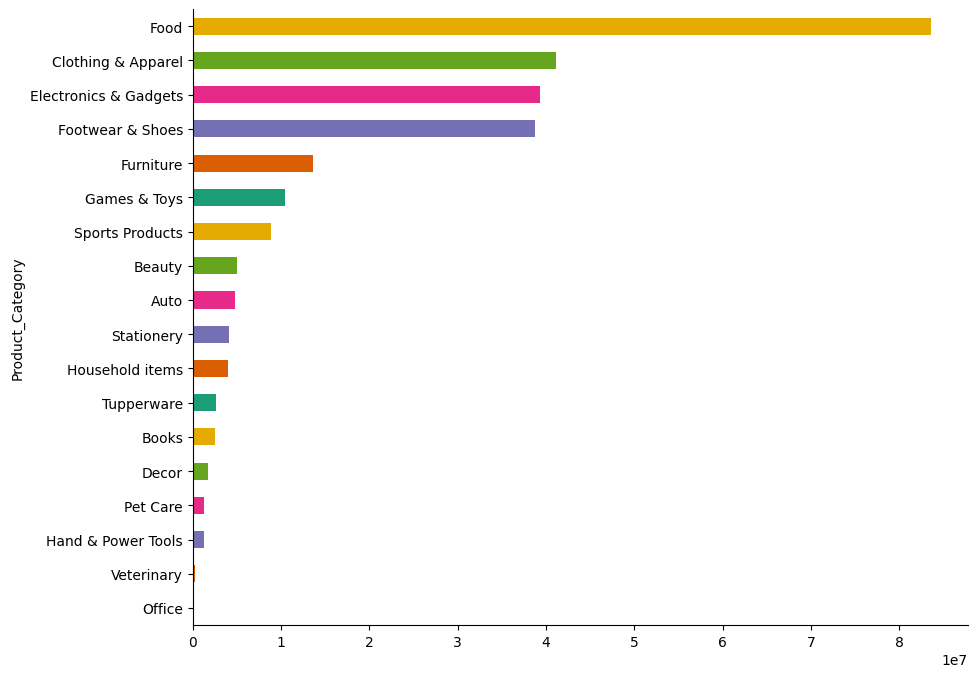

In [108]:
#Sales by product category
plt.subplots(figsize=(10, 8))
sales_data.groupby(['Product_Category']).apply(lambda x:((x['Amount']*x['Orders'])).sum()).sort_values().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

From the above analysis , we can conculde that **Food sector** have **highest sale** , followed by clothing,electronics, footwear.

The most sales made by **age group 26-35** . A significant  contribution made by **Female customers**.

Most customers are from **IT Sector**.

**Southern and central region** sales are competetive followed by Western region.